<a href="https://colab.research.google.com/github/gmazzitelli/GSN2/blob/master/strategie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**strategie CSN2**
*   datasheet: https://docs.google.com/spreadsheets/d/1jyfiaNPW1-4X78L9Q-7tU85jtBGKjJPhBfjkJ4YCq3U/





In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", rc={"font.size":11,"axes.titlesize":16,"axes.labelsize":11})
c = ['tab:blue','tab:red', 'tab:gray','tab:orange','tab:green', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

def Exp(x, p0, p1): # negative exponential
  import numpy as np
  return p0*np.exp(x/p1)

def Line(x, m, q):
  import numpy as np
  return m*x + q

def Gain(x, p0, p1):
  import numpy as np
  return p0*x**p1

def panda_from_gspreadsheet(key, sheet_name='Sheet1', header=0):
  # google spredsheet TO panda dataframe
  # ricordarsi di abilitare lo sharing pubblico dei dati

  url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
      key=key, sheet_name=sheet_name.replace(' ', '%20'))
  return pd.read_csv(url, header=header)

# df =  panda_from_gspreadsheet('1MWRb1xbkpZOmUBLCLaC9ud4htvPEWYC7F8IuTt84YBg', sheet_name='Sheet1')
df =  panda_from_gspreadsheet('1jyfiaNPW1-4X78L9Q-7tU85jtBGKjJPhBfjkJ4YCq3U', sheet_name='From Respones 1')

In [142]:
df.columns

Index(['Timestamp', 'Sezione/Laboratorio', '1) di cosa ti occupi?',
       '2) la CSN2 ha sempre finanziato l'R&D a supporto di esperimenti in fase di upgrade. Cosa pensi dell'idea che la CSN2 inizi a supportare R&D per la ricerca di nuove tecnologie.',
       '3) Oltre a ERC e progetti esterni (supportati dalla CSN2 solo per le spese non rendicontabili), cosa ne pensi del fatto che la CSN2 supporti progetti "high risk high gain"?',
       '6) quale ritieni sia il pilastro fondamentale della commissione per i prossimi 5-10 anni',
       'in riferimento alla scelta nella domanda 6 quali ritieni siano i punti di forza',
       'in riferimento alla scelta nella domanda 6 quali ritieni siano le eventuali debolezze',
       'in riferimento alla scelta nella domanda 6 quali ritieni siano le opportunità ',
       'in riferimento alla scelta nella domanda 6, quali ritieni siano le eventuali minacce ',
       'commento',
       '4) La CSN2 non supporta direttamente attività/laboratori (spazio, 

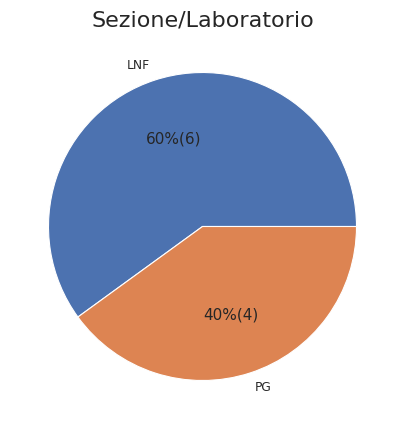

In [124]:
fig, ax = plt.subplots(figsize=(5,5))
what = "Sezione/Laboratorio"
elements = len(df[what])
df.value_counts(df[what]).plot(kind='pie', autopct=lambda x: '{:.0f}%({:.0f})'.format(x, x*elements/100), label="")
plt.title(what)
plt.show()

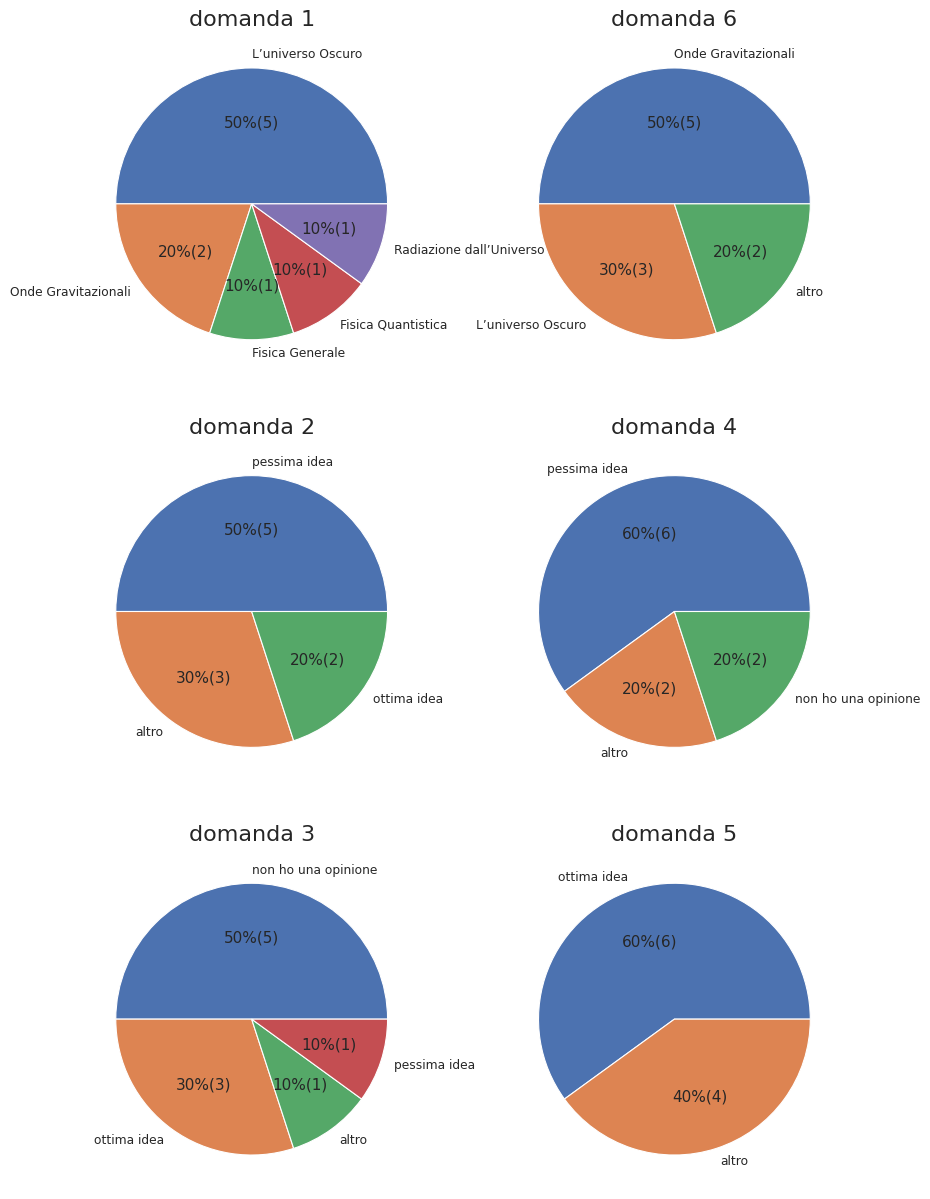

In [141]:
ans=['pessima idea', 'ottima idea', 'non ho una opinione']
linee=['Fisica del Neutrino', 'Radiazione dall’Universo', 'L’universo Oscuro', 'Onde Gravitazionali', 'Fisica Generale', 'Fisica Quantistica']
question = [x for x in df.columns if ") " in x]
fig, ax = plt.subplots(3,2, figsize=(10,15))
dp = df
k = 0
for i, q in enumerate(question):
  if int(q[0:1])!=1 and int(q[0:1])!=6 :
    for j, a in enumerate(df[q]):
      if not (a in ans):
        df.loc[j,q]='altro'
  if int(q[0:1])==6:
    for j, a in enumerate(df[q]):
      if not (a in linee):
        df.loc[j,q]='altro'
  if i%3==0 and i>1:
    k+=1
  df.value_counts(df[q]).plot(kind='pie', ax=ax[i%3, k], autopct=lambda x: '{:.0f}%({:.0f})'.format(x, x*elements/100), label="")

  ax[i%3, k].set_title("domanda "+q[0:1])
plt.show()